### 1.데이터 그룹 분석 

#### 집계합수

In [1]:
#판다스 라이브러리 불러오기
import pandas as pd 

#파일경로를 찾고 변수 file_path에 저장
file_path= 'C:/data/exam_sample.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [2]:
 # 반별 로 그룹화(A,B,C반)
# 반별 그룹 오브젝트만 생성
df1=df.groupby(['class'])
df1 

In [3]:
# 반 중 A반 그룹만 확인
df1.get_group('A')

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m


In [4]:
# 반별 그룹 평균 확인
df.groupby('class').mean()

,student_no,science,english,math
class,,,,
A,2.5,61.50,94.75,46.25
B,6.5,58.25,84.25,77.50
C,9.5,30.00,95.50,35.00


In [5]:
# 반별,성별 그룹 평균 확인
df.groupby(['class','sex']).mean()

student_no  science  english  math
class sex                                    
A     m           2.5     54.0     98.0  40.0
      w           2.5     69.0     91.5  52.5
B     m           6.5     71.5     89.5  65.0
      w           6.5     45.0     79.0  90.0
C     w           9.5     30.0     95.5  35.0

In [19]:
# 반별 수학 평균
df['math'].groupby(df['class']).mean()
df.groupby(df['class'])['math'].mean()

class
A    46.25
B    77.50
C    35.00
Name: math, dtype: float64

In [20]:
# 반별 수학 개수
df['math'].groupby(df['class']).count()

class
A    4
B    4
C    2
Name: math, dtype: int64

In [17]:
# 성별 수학평균
df_mean=df['math'].groupby(df['sex']).mean()

sexgroup = df.groupby('sex')

print(df_mean)
print(sexgroup)
print(sexgroup.groups)

sex
m    52.500000
w    59.166667
Name: math, dtype: float64
{'m': Int64Index([0, 3, 5, 6], dtype='int64'), 'w': Int64Index([1, 2, 4, 7, 8, 9], dtype='int64')}


In [22]:
# 남학생 수학평균
male=sexgroup.get_group('m')
subset = male[['sex', 'math']]
print(male)
print(subset)

   student_no class  science  english  math sex
0           1     A       50       98    50   m
3           4     A       58       98    30   m
5           6     B       98       89    50   m
6           7     B       45       90    80   m
  sex  math
0   m    50
3   m    30
5   m    50
6   m    80


### 2.데이터 재구조화

#### 데이터 구간화

In [29]:
#판다스 라이브러리 불러오기
import pandas as pd 

#파일경로를 찾고 변수 file_path에 저장
file_path= 'C:/data/exam_sample.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [30]:
#math 변수에 대해서 3개 동일한 길이로 범주형 변수로 만들어보자 범주 구간은 Categories (3, interval[float64]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]] 로 3개 구간 길이가 동일함을 알 수 있다.
df1=pd.cut(df.math, 3)
df1

0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

In [34]:
#math 변수에 3개 구간의 범주를 그룹 함수를 추가해서 각 범주의 그룹별로 agg( ) 함수인 개수(count), 평균(mean), 표준편차(std), 최소값(min), 최대값(max) 값을 계산해보자 
df2 = df.math.groupby(df1)
df2
df3=df2.agg(['count', 'mean', 'std', 'min', 'max'])
df3

,count,mean,std,min,max
math,,,,,
"(19.93, 43.333]",2,25.000000,7.071068,20,30
"(43.333, 66.667]",5,51.000000,5.477226,45,60
"(66.667, 90.0]",3,86.666667,5.773503,80,90


In [6]:
#pd.qcut() 함수를 사용 math에 대해서 각 범주 구간 별로 동일하게 3개의 개수를 가지도록 범주를 만들수도 있다. 이때 labels=False 로 설정하여 label이 0, 1, 2 구간을 0부터 순차적으로 1씩 증가하게 한다.  
df4= pd.qcut(df.math, 3, labels=False)
df4

0    0
1    1
2    0
3    0
4    2
5    0
6    2
7    2
8    0
9    0
Name: math, dtype: int64

In [7]:
#아래처럼 labels=np.arange(3, 0, -1)로 직접 지정을 해주면 label이 3, 2, 1 로 3부터 1씩 줄어드는 순서로 할당이 된다. 위의 label 과 정 반대로 할당이 되었다. 

import numpy as np 
df5 = pd.qcut(df.math, 3, labels=np.arange(3, 0, -1))
df5

0    3
1    2
2    3
3    3
4    1
5    3
6    1
7    1
8    3
9    3
Name: math, dtype: category
Categories (3, int64): [3 < 2 < 1]

In [8]:
 # [3 < 2 < 1] 순서로 동일 개수로 나눈 3개의 그룹별 통계량을 계산 할 수 있다. 
df6 = df.math.groupby(df5)
df7=df6.agg(['count', 'mean', 'std', 'min', 'max'])
df7

,count,mean,std,min,max
math,,,,,
3,6,40.833333,12.812754,20,50
2,1,60.000000,NaN,60,60
1,3,86.666667,5.773503,80,90


#### 원-핫인코딩

In [36]:
# 유형확인
df.dtypes


student_no     int64
class         object
science        int64
english        int64
math           int64
sex           object
dtype: object

In [15]:
# 범주형 원핫코딩
df = pd.get_dummies(df)
df

,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,50,1,0,0,1,0
1,2,60,97,60,1,0,0,0,1
2,3,78,86,45,1,0,0,0,1
3,4,58,98,30,1,0,0,1,0
4,5,65,80,90,0,1,0,0,1
5,6,98,89,50,0,1,0,1,0
6,7,45,90,80,0,1,0,1,0
7,8,25,78,90,0,1,0,0,1
8,9,15,98,20,0,0,1,0,1
9,10,45,93,50,0,0,1,0,1


#### 데이터 전치

In [17]:
# 원자료
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [18]:
# 전치 자료
df.T

,0,1,2,3,4,5,6,7,8,9
student_no,1,2,3,4,5,6,7,8,9,10
class,A,A,A,A,B,B,B,B,C,C
science,50,60,78,58,65,98,45,25,15,45
english,98,97,86,98,80,89,90,78,98,93
math,50,60,45,30,90,50,80,90,20,50
sex,m,w,w,m,w,m,m,w,w,w


#### 피봇테이블

In [19]:
# 원자료와 피봇 자료는 확인해보자
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [20]:
# 반(class) 변수를 행 데이터로 피봇
pd.pivot_table(df,index='class', columns='sex', values='science')

sex,m,w
class,,
A,54.0,69.0
B,71.5,45.0
C,NaN,30.0


In [21]:
# 성별(sex) 변수를 행 데이터로 피봇
pd.pivot_table(df,index='sex', columns='class', values='science') 

class,A,B,C
sex,,,
m,54.0,71.5,NaN
w,69.0,45.0,30.0


#### 멜트 

In [22]:
# 멜트 함수 
pd.melt(df,id_vars=['student_no', 'class'])

,student_no,class,variable,value
0,1,A,science,50
1,2,A,science,60
2,3,A,science,78
3,4,A,science,58
4,5,B,science,65
5,6,B,science,98
6,7,B,science,45
7,8,B,science,25
8,9,C,science,15
9,10,C,science,45


#### 스택/언스택

In [23]:
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [24]:
# 스택/언스택
df5 = df.stack()
df5

0  student_no     1
   class          A
   science       50
   english       98
   math          50
   sex            m
1  student_no     2
   class          A
   science       60
   english       97
   math          60
   sex            w
2  student_no     3
   class          A
   science       78
   english       86
   math          45
   sex            w
3  student_no     4
   class          A
   science       58
   english       98
   math          30
   sex            m
4  student_no     5
   class          B
   science       65
   english       80
   math          90
   sex            w
5  student_no     6
   class          B
   science       98
   english       89
   math          50
   sex            m
6  student_no     7
   class          B
   science       45
   english       90
   math          80
   sex            m
7  student_no     8
   class          B
   science       25
   english       78
   math          90
   sex            w
8  student_no     9
   class          C


In [25]:
df6 = df.unstack(level=-1)
df6

student_no  0     1
            1     2
            2     3
            3     4
            4     5
            5     6
            6     7
            7     8
            8     9
            9    10
class       0     A
            1     A
            2     A
            3     A
            4     B
            5     B
            6     B
            7     B
            8     C
            9     C
science     0    50
            1    60
            2    78
            3    58
            4    65
            5    98
            6    45
            7    25
            8    15
            9    45
english     0    98
            1    97
            2    86
            3    98
            4    80
            5    89
            6    90
            7    78
            8    98
            9    93
math        0    50
            1    60
            2    45
            3    30
            4    90
            5    50
            6    80
            7    90
            8    20
            9    50


### 3. 시계열 데이터

#### 시간 조작

In [37]:
# Period 객체는 to_period(freq='기간인수')를 통해 datetime 변수에 대해 어떤 기간에 따른 자료형을 생성하고자 할 때 주로 활용
#datetime 유형에 대해서만 적용 가능

# 시간 정의
dates = ['2020-01-01','2020-03-01','2021-09-01']
dates


['2020-01-01', '2020-03-01', '2021-09-01']

In [38]:
# 시간자료형 생성
ts_dates = pd.to_datetime(dates)
ts_dates


DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [40]:
# Timestamp를 Period변환
pr_day = ts_dates.to_period(freq='D')   #1일 기간
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]', freq='D')

In [42]:
pr_month = ts_dates.to_period(freq='M') #1개월 기간
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]', freq='M')

In [43]:
pr_year = ts_dates.to_period(freq='A')  #1년 기간
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')

#### 타임스탬프

In [49]:
#판다스 라이브러리 불러오기
import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'C:/data/timeseries.csv'
#read csv()함수로 데이터프레임 변환 
df= pd.read_csv(file_path)

# 현재 날짜를 나타내는 Date컬럼은 문자형(object)이므로 to_datetime()함수를 이용해서 Date컬럼을 시계열 객체(Timestamp)로 변환
df.info()
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
Date      5 non-null object
Close     5 non-null int64
Start     5 non-null int64
High      5 non-null int64
Low       5 non-null int64
Volume    5 non-null int64
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




In [51]:
print(df.info())
print('\n')
print(type(df['new_Date'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
Date        5 non-null object
Close       5 non-null int64
Start       5 non-null int64
High        5 non-null int64
Low         5 non-null int64
Volume      5 non-null int64
new_Date    5 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes
None


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [39]:
# 기존 Date열을 지우고 new_Date를 인덱스로 지정
# 데이터요약정보를 보면, 인덱스가 DatetimeIndex변경 되었고 2015년07월02일에서 2019년06월26일 사이에 5개 날짜가 있다. 
df.drop('Date', axis = 1, inplace=True)
df.set_index('new_Date', inplace=True)
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2015-07-02  10100  10850  10900  10000  137977
2016-06-29  10700  10550  10900   9990  170253
2017-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2019-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
Close     5 non-null int64
Start     5 non-null int64
High      5 non-null int64
Low       5 non-null int64
Volume    5 non-null int64
dtypes: int64(5)
memory usage: 240.0 bytes
None


In [40]:
# Timestamp와 Period의 차이 확인 , Timestamp를 Period로 변환
# Period객체는 to_period(freq='기간인수')를 통해 datetime변수에 대해 어떤 기간에 따른 자료형을 생성하고자 할 때 주로 활용된다. 아무 자료형이나 사용할 수 없고 datetime유형에 대해서만 적용 가능
dates = ['2020-01-01','2020-03-01','2021-09-01']
ts_dates = pd.to_datetime(dates)
print(ts_dates)
print('\n')

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)




In [41]:
# Timestamp를 Period변환
pr_day = ts_dates.to_period(freq='D')   #1일 기간
print(pr_day)
pr_month = ts_dates.to_period(freq='M') #1개월 기간
print(pr_month)
pr_year = ts_dates.to_period(freq='A')  #1년 기간
print(pr_year)

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]', freq='D')
PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]', freq='M')
PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')


#### 기간함수

In [42]:
timestamp_df = pd.date_range(start = '2020-01-01',  # 날짜 범위 시작
                     end = None, # 날짜 범위 끝
                     periods = 6, # 생성할 Timestamp 개수
                     freq = 'MS', # 시간 간격(MS : 월의 시작일)
                     tz = 'Asia/Seoul') # 시간대(timezone)
timestamp_df

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-02-01 00:00:00+09:00',
               '2020-03-01 00:00:00+09:00', '2020-04-01 00:00:00+09:00',
               '2020-05-01 00:00:00+09:00', '2020-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [63]:
# period_range()
#Period는 기간을 나타내는 자료형 이므로, 배열을 적용할때 freq= 인자는 기간의 단위를 의미한다

# 1개월 기간
pr_m = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = 'M') 
print(pr_m)
print('\n')

# 1시간 기간
pr_h = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = 'H')           
print(pr_h)
print('\n')

# 2시간 기간
pr_2h = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = '2H')          
print(pr_2h)

PeriodIndex(['2020-01', '2020-02', '2020-03'], dtype='period[M]', freq='M')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[H]', freq='H')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2H]', freq='2H')


In [66]:
# 시계열 활용
# 날짜 데이터 분리 날짜 데이터 분리 : dt.year, dt.month, dt.day
#판다스 라이브러리 불러오기

import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'C:/data/timeseries.csv'
#read csv()함수로 데이터프레임 변환 
df= pd.read_csv(file_path)
df.info()
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print('\n')
 
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
Date      5 non-null object
Close     5 non-null int64
Start     5 non-null int64
High      5 non-null int64
Low       5 non-null int64
Volume    5 non-null int64
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [67]:
# to_period()함수를 이용해 표기 변경 
df['Date_yr'] = df['new_Date'].dt.to_period(freq = 'A')  # 연도까지
df['Date_m'] = df['new_Date'].dt.to_period(freq = 'M')   # 연월까지
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr,Date_m
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06


In [68]:
# 날짜 인덱스 지정
df.set_index('new_Date',inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06


In [69]:
# 날짜 인덱싱
print(df.loc['2015-07']) # 7월에 해당하는 row 인덱싱
print('\n')
print(df['2019-06']) # 6월에 해당하는 row 인덱싱
print('\n')
print(df['2018-06-25' : '2018-06-20'])  # 해당기간의 인덱싱

                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2015-07-02  2015-07-02  10100  10850  10900  10000  137977  2015      7    2   

           Date_yr   Date_m  
new_Date                     
2015-07-02    2015  2015-07  


                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2019-06-26  2019-06-26  10800  10900  11000  10700   63039  2019      6   26   

           Date_yr   Date_m  
new_Date                     
2019-06-26    2019  2019-06  


Empty DataFrame
Columns: [Date, Close, Start, High, Low, Volume, Year, Month, Day, Date_yr, Date_m]
Index: []


In [70]:
# 오늘날짜와 차리 열 추가
today = pd.to_datetime('2020-03-18')
df['time_diff'] = today - df.index
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m,time_diff
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07,1721 days
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06,1358 days
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06,994 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06,630 days
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06,266 days


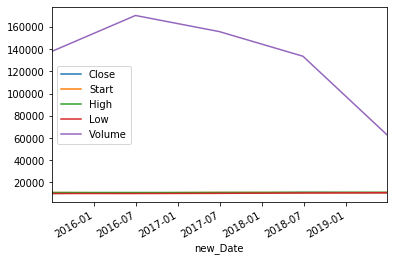

In [71]:
# 데이터를 다시 불러와 시간 인덱스 지정 후 단순 시각화
import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'C:/data/timeseries.csv'
#read csv()함수로 데이터프레임 변환 
df= pd.read_csv(file_path)
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date',inplace=True)
df.plot()